In [23]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("white")
rc={'axes.labelsize': 20, 'font.size': 20, 'legend.fontsize': 20, 'axes.titlesize': 20}
plt.rcParams.update(**rc)
plt.rcParams['figure.figsize'] = 30, 12

# Import fred api and inilialize an instance

In [3]:
from fredapi import Fred
fred = Fred(api_key='inssert key here')

In [43]:
from datetime import date
today = date.today().strftime("%m/%d/%y")

In [86]:
vix = fred.get_series('VIXCLS')
wilshire = fred.get_series('WILL5000INDFC')

In [47]:
wilshire.tail()

2021-01-28    190.10
2021-01-29    186.66
2021-02-01    189.87
2021-02-02    192.63
2021-02-03    192.97
dtype: float64

In [44]:
dollar = fred.get_series('DTWEXBGS',observation_end=today)

In [45]:
dollar.tail()

2021-01-25    112.1432
2021-01-26    111.9220
2021-01-27    112.3536
2021-01-28    112.2838
2021-01-29    112.2376
dtype: float64

In [48]:
fundrate = fred.get_series('FEDFUNDS')

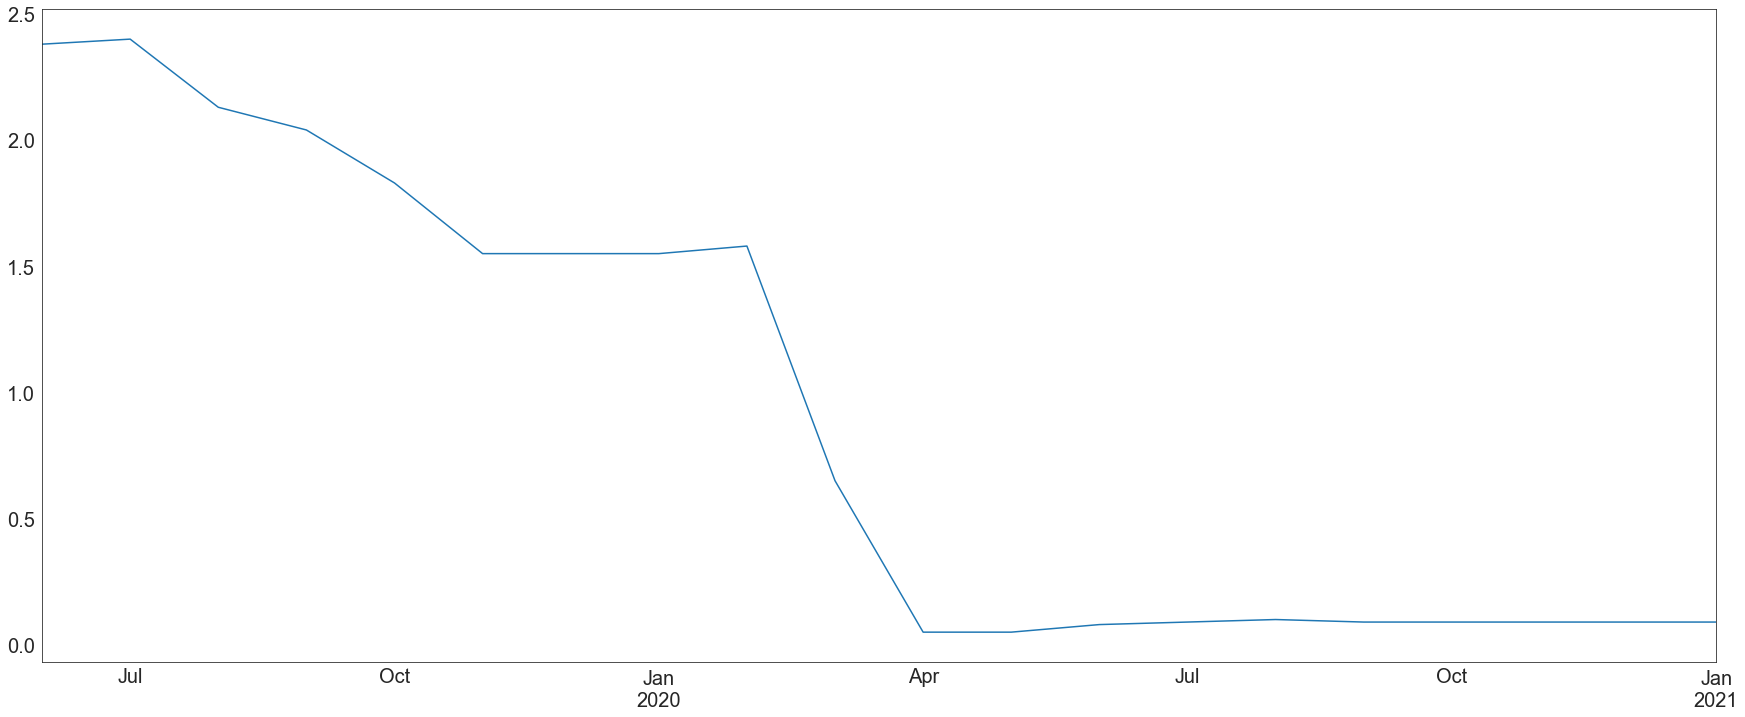

In [49]:
fundrate[-20:].plot()

# treasury rate spreads

- t30yr = fred.get_series('DGS30') 
- t10yr = fred.get_series('DGS10')
- t2yr = fred.get_series('DGS2')

In [50]:
cols = ['DGS30','DGS10','DGS5','DGS2','DGS3MO','DGS1MO']
treasury = pd.DataFrame(columns=cols)
for s_id in cols:
    treasury[s_id] = fred.get_series(s_id)

In [53]:
treasury.tail(10)

,DGS30,DGS10,DGS5,DGS2,DGS3MO,DGS1MO
2021-01-20,1.84,1.10,0.45,0.13,0.08,0.08
2021-01-21,1.87,1.12,0.45,0.13,0.09,0.07
2021-01-22,1.85,1.10,0.44,0.13,0.08,0.07
2021-01-25,1.80,1.05,0.42,0.13,0.09,0.07
2021-01-26,1.80,1.05,0.42,0.11,0.07,0.05
2021-01-27,1.79,1.04,0.41,0.12,0.08,0.05
2021-01-28,1.81,1.07,0.42,0.12,0.07,0.05
2021-01-29,1.87,1.11,0.45,0.11,0.06,0.07
2021-02-01,1.84,1.09,0.42,0.11,0.07,0.06
2021-02-02,1.87,1.12,0.45,0.11,0.07,0.04


In [26]:
import matplotlib.patches as patches

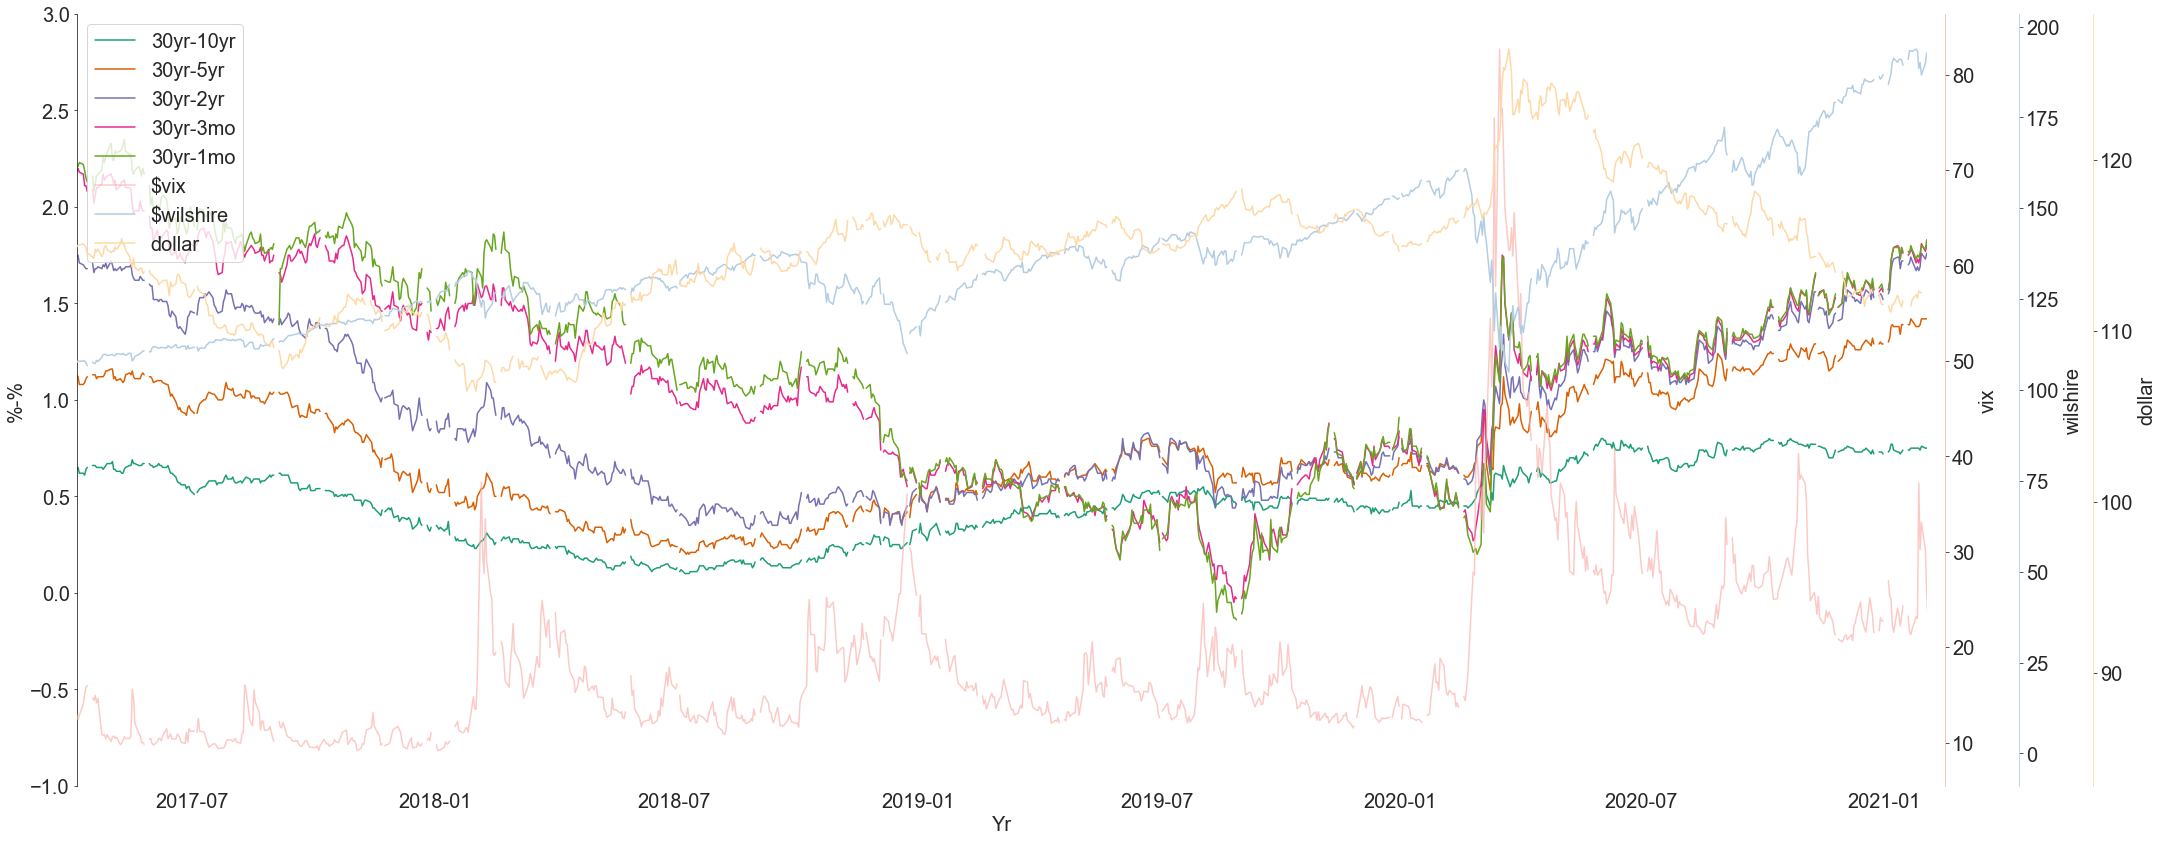

In [58]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax1 = plt.subplots()
#fig.subplots_adjust(right=0.75)

make_patch_spines_invisible(ax1)
ax1.spines["left"].set_visible(True)

cpaired = plt.get_cmap('Paired')
cpastel = plt.get_cmap('Pastel1')
cdark = plt.get_cmap('Dark2')

#color = 'tab:red'
ax1.set_xlabel('Yr')
ax1.set_ylabel('%-%')
l1, = ax1.plot(treasury.index, treasury['DGS30']-treasury['DGS10'],color=cdark(0), label='30yr-10yr')
l2, = ax1.plot(treasury.index, treasury['DGS30']-treasury['DGS5'], color=cdark(1),label='30yr-5yr')
l3, = ax1.plot(treasury.index, treasury['DGS30']-treasury['DGS2'], color=cdark(2),label='30yr-2yr')
l4, = ax1.plot(treasury.index, treasury['DGS30']-treasury['DGS3MO'],color=cdark(3),label='30yr-3mo')
l5, = ax1.plot(treasury.index, treasury['DGS30']-treasury['DGS1MO'],color=cdark(4),label='30yr-1mo')

ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.spines["right"].set_position(("axes", 1.01))
make_patch_spines_invisible(ax2)
ax2.spines["right"].set_visible(True)
ax2.spines['right'].set_color(cpastel(0))

#color = 'tab:blue'
ax2.set_ylabel('vix')  # we already handled the x-label with ax1
l6, = ax2.plot(vix.index,vix,label='$vix',color=cpastel(0),alpha=0.7)
ax2.tick_params(axis='y')


#### wilshire
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.05))
make_patch_spines_invisible(ax3)
ax3.spines["right"].set_visible(True)
ax3.spines['right'].set_color(cpastel(1))

ax3.set_ylabel('wilshire')
l7, = ax3.plot(wilshire.index,wilshire,color=cpastel(1),label='$wilshire')

### dollar
ax4 = ax1.twinx()
ax4.spines["right"].set_position(("axes", 1.09))
make_patch_spines_invisible(ax4)
ax4.spines["right"].set_visible(True)
ax4.spines['right'].set_color(cpastel(4))

ax4.set_ylabel('dollar')
l8, = ax4.plot(dollar.index,dollar,color=cpastel(4),label='dollar')

lines = [l1,l2,l3,l4,l5,l6,l7,l8]
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(lines, [l.get_label() for l in lines],loc=2)


# set xlim
ax1.set_xlim([treasury.index[-1000],treasury.index[-1]])
ax1.set_ylim(-1,3)
# draw rectangle
#rect = patches.Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
#ax1.add_patch(rect)

#plt.savefig(r'TreasurySpreads.png',dpi=300,bbox_inches = 'tight')
plt.show()

In [87]:
vix.tail()

2021-01-28    30.21
2021-01-29    33.09
2021-02-01    30.24
2021-02-02    25.56
2021-02-03    22.91
dtype: float64

# ARIMA model for prediction

In [106]:
vix = pd.DataFrame(vix,columns=['vix'])
vix['date']=vix.index
vix['date'] = vix['date'].apply(lambda x: pd.to_datetime(x.strftime("%Y%m%d"), format='%Y%m%d'))
vix["weekday"] = vix["date"].dt.weekday
baddays = vix.query("weekday > 4")
baddays

,vix,date,weekday


In [33]:
dollar.tail()

2021-01-25    112.1432
2021-01-26    111.9220
2021-01-27    112.3536
2021-01-28    112.2838
2021-01-29    112.2376
dtype: float64

In [27]:
fred.search('DTWEXBGS')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
DTWEXBGS,Daily,D,DTWEXBGS,2021-02-01 15:20:42-06:00,None,2021-01-29,2006-01-02,81,2021-02-03,2021-02-03,Not Seasonally Adjusted,NSA,"Trade Weighted U.S. Dollar Index: Broad, Goods...",Index Jan 2006=100,Index Jan 2006=100


In [ ]:
fred.search_by_release(151)

In [ ]:
fred.search_by_category(

# color

In [12]:
cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

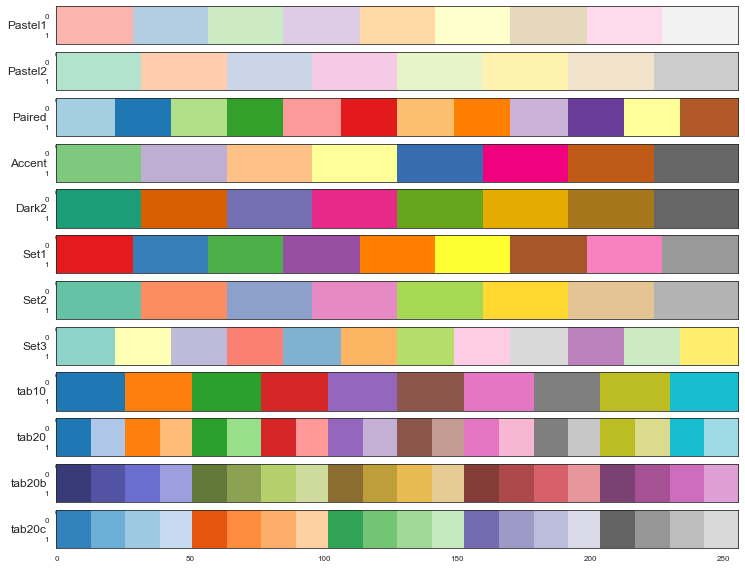

In [14]:
rc={'axes.labelsize': 12, 'font.size': 8, 'legend.fontsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(**rc)
plt.rcParams['figure.figsize'] = 12, 8

fig, axes = plt.subplots(nrows=len(cmaps))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
#axes[0].set_title(+ ' colormaps', fontsize=14)

for ax, name in zip(axes, cmaps):
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
    pos = list(ax.get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    fig.text(x_text, y_text, name, va='center', ha='right', fontsize=12)